## 4 Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('../data/cluster_Data.csv')

In [3]:
data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [4]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


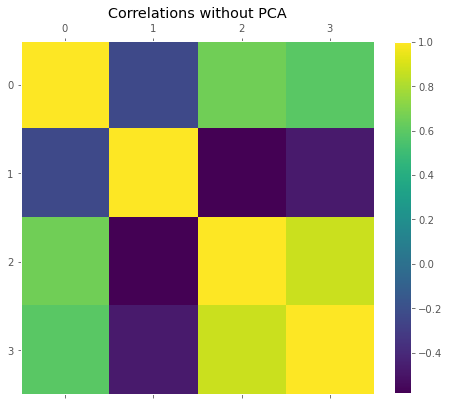

In [5]:
matfig = plt.figure(figsize=(7,7))
plt.matshow(data.corr(), fignum=matfig.number)
plt.grid(False)
plt.title('Correlations without PCA')
plt.colorbar(fraction = 0.045)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 10.8 KB


In [7]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture


def get_n_clusters(model, data):
    
    # elbow
    model_elbow = model
    visualizer = KElbowVisualizer(model_elbow, k=(2,30), show = False)
    visualizer.fit(data)
    n_clusters_elbow = visualizer.elbow_value_
    
    # silhouette
    model_silhouette = model
    visualizer = KElbowVisualizer(model_silhouette, k=(2,30), metric = 'silhouette', show = False)
    visualizer.fit(data)
    n_clusters_silhouette = visualizer.elbow_value_
    
    # calinski_harabasz
    
    model_calinski = model
    visualizer = KElbowVisualizer(model_calinski, k=(2,30),metric='calinski_harabasz', show = False)
    visualizer.fit(data)
    n_clusters_calinski = visualizer.elbow_value_
    
    plt.close()    
    n_components = range(1, 30)
    
    covariance_type = ['spherical', 'tied', 'diag', 'full']
    scores=[]
    
    for cov in covariance_type:
        for n_comp in n_components:
            gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 0)
            gmm.fit(data)
            scores.append((cov,n_comp,gmm.bic(data)))
    
    best_bic = min(scores, key = lambda r: r[2])
    
    res =  {'elbow': n_clusters_elbow,
           'silhouette': n_clusters_silhouette, 
           'calinski_harabasz': n_clusters_calinski,
           'bic': best_bic[1]}
    
    votes = [res[list(res.keys())[i]] for i in range(len(res))] + [best_bic[1]]
    majority = max(set(votes), key = votes.count)
    
    return res, majority


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans()
res, n_clusters = get_n_clusters(kmeans, data)

print('Result: ', res)
print('Majority: ', n_clusters)

C:\Users\sarak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sarak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sarak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sarak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Window

Result:  {'elbow': 7, 'silhouette': 2, 'calinski_harabasz': 2, 'bic': 3}
Majority:  2


# 2D Visualization

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data)

scaled_data = scaler.fit_transform(data)

## Umap

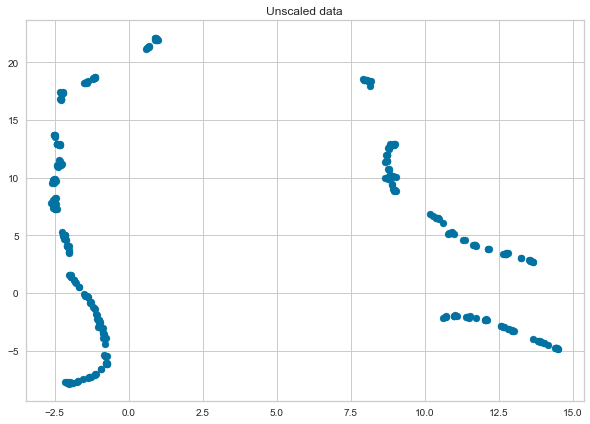

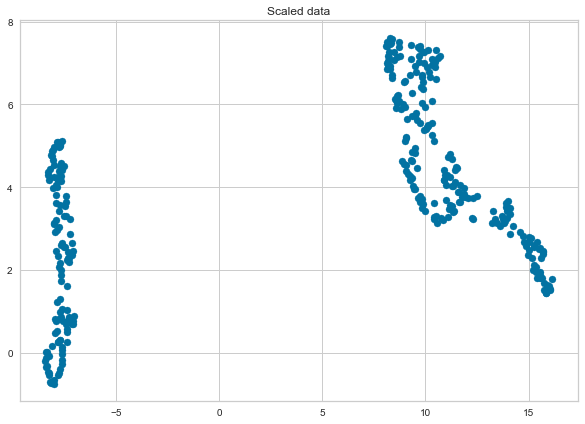

In [10]:
import umap

reducer = umap.UMAP()
umap_components = reducer.fit_transform(data)

plt.figure(figsize=(10,7))
plt.scatter(umap_components[:, 0], umap_components[:, 1])
plt.title('Unscaled data')
plt.show()

reducer = umap.UMAP()
umap_components = reducer.fit_transform(scaled_data)

plt.figure(figsize=(10,7))
plt.scatter(umap_components[:, 0], umap_components[:, 1])
plt.title('Scaled data')
plt.show()

## t-SNE

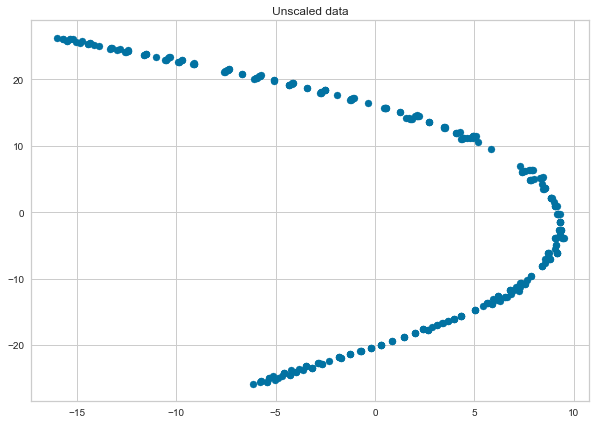

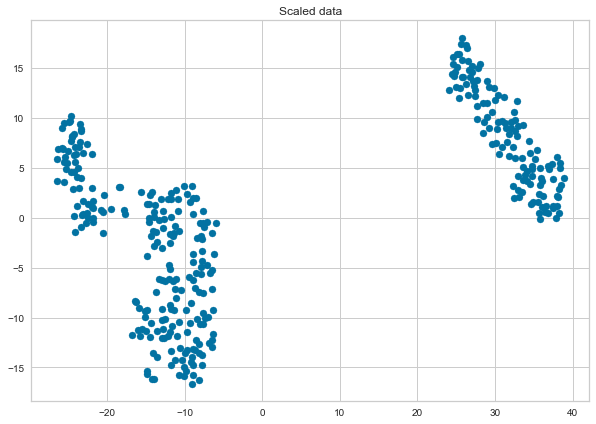

In [11]:
from sklearn.manifold import TSNE

tsne_components = TSNE(n_components=2, random_state = 0, perplexity = 30, init = 'random', learning_rate = 200).fit_transform(data)

plt.figure(figsize = (10,7))
plt.scatter(tsne_components[:,0], tsne_components[:,1])
plt.title('Unscaled data')
plt.show()

tsne_components = TSNE(n_components=2, random_state = 0, perplexity = 30, init = 'random', learning_rate = 200).fit_transform(scaled_data)

plt.figure(figsize = (10,7))
plt.scatter(tsne_components[:,0], tsne_components[:,1])
plt.title('Scaled data')
plt.show()

Som vi ser så ger TSNE en bättre separering när den använder den skalade datan. 

# PCA

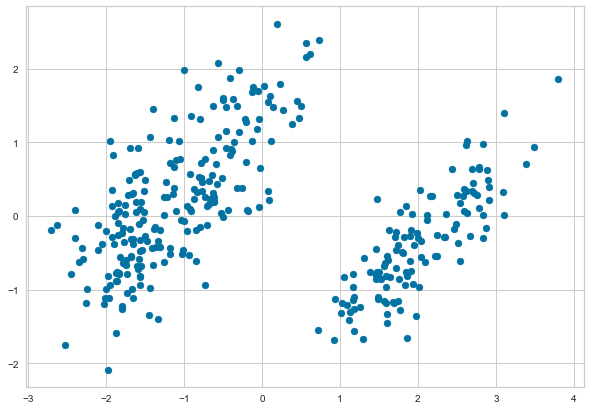

In [12]:
from sklearn.decomposition import PCA

# PCA kräver att alla features har samma skala så vi kör standardscaling på vår data så alla har ett 
# medelvärde på 0 och en standardavvikelse på 1. Annars hade pca sagt att kolumner med höga värden 
# bidrar med hög varians i datat, vilket nödvändigtvis inte är fallet.


pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize = (10,7))
plt.scatter(principal_components[:,0], principal_components[:,1])
plt.show()

# GaussianMixture model

In [13]:
cv_types = ['full', 'tied', 'diag', 'spherical']
n_clusters = [2,3,4,5,6,7,8,9,10]

In [14]:
results = []

for n_c in n_clusters:
    for cv_t in cv_types:
        gm = GaussianMixture(n_components=n_c, random_state=0, covariance_type = cv_t).fit(data)
        res = {'model': gm, 'n_clusters': n_c, 'cv_type': cv_t, 'bic_score': gm.bic(data)}
        results.append(res)

In [15]:
best_gm = min(results, key = lambda res: res['bic_score'])

print(f"Covariance type: {best_gm['cv_type']}\nNumber of clusters: {best_gm['n_clusters']}\nBIC score: {round(best_gm['bic_score'], 1)}")
                                                                                                                                                                                              
                                                                                                  

Covariance type: full
Number of clusters: 3
BIC score: 10558.3


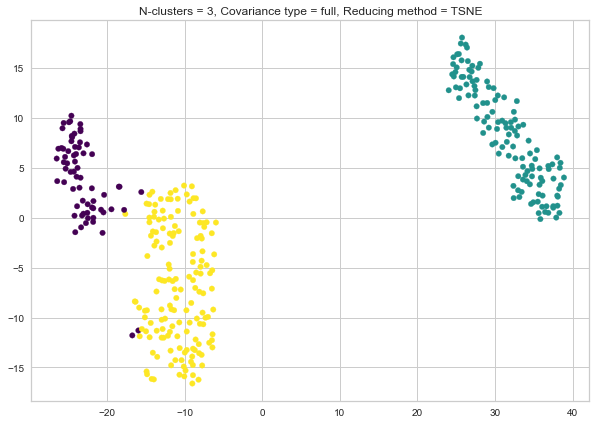

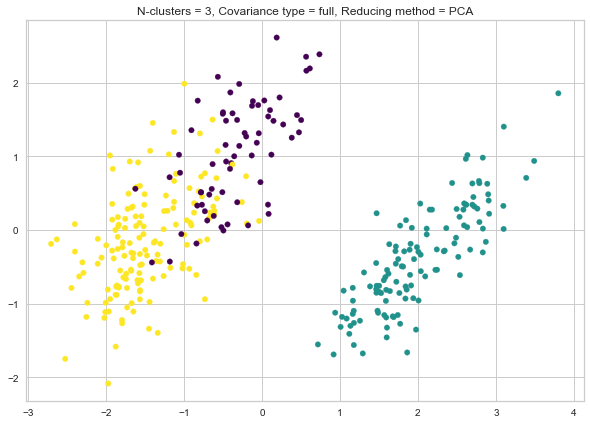

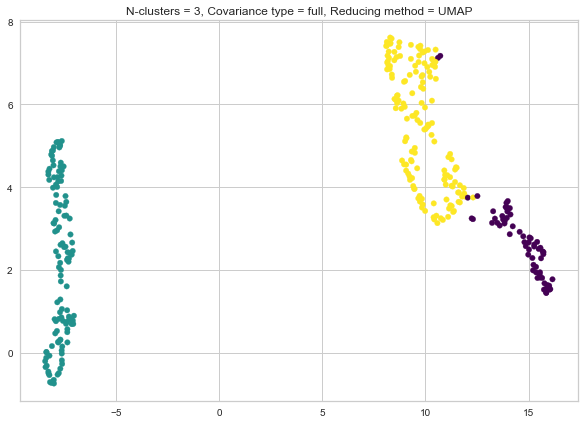

In [16]:
gm = GaussianMixture(n_components=3, random_state=0, covariance_type = 'full').fit(scaled_data)

plt.figure(figsize = (10,7))
plt.title('N-clusters = 3, Covariance type = full, Reducing method = TSNE')
plt.scatter(tsne_components[:,0], tsne_components[:,1], c = gm.predict(scaled_data), s = 30, cmap = 'viridis')
plt.show()

plt.figure(figsize = (10,7))
plt.title('N-clusters = 3, Covariance type = full, Reducing method = PCA')
plt.scatter(principal_components[:,0], principal_components[:,1], c = gm.predict(scaled_data), s = 30, cmap = 'viridis')
plt.show()

plt.figure(figsize = (10,7))
plt.title('N-clusters = 3, Covariance type = full, Reducing method = UMAP')
plt.scatter(umap_components[:,0], umap_components[:,1], c = gm.predict(scaled_data), s = 30, cmap = 'viridis')
plt.show()

Som vi ser så får vi bra visualisering med TSNE, så därför kommer den framöver at användas som visualiseringsverktyg

# DBSCAN

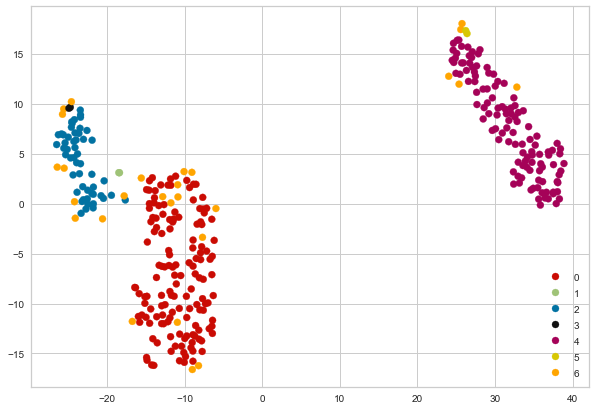

In [17]:
from matplotlib.colors import ListedColormap
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.55, min_samples=2).fit(scaled_data)

labels = clustering.labels_
labels = [label if label != -1 else 6 for label in labels]
colours = ListedColormap(['r', 'g', 'b', 'k', 'm', 'y', 'orange'])

plt.figure(figsize = (10,7))
scatter = plt.scatter(tsne_components[:,0], tsne_components[:,1], c=labels, cmap=colours)
plt.legend(*scatter.legend_elements(), loc = 4)
plt.show()

Som vi ser så har vi tre distinkta kluster, samt lite brus. De orangea punkterna har modellen själv klassificerat som brus. Klasserna 0(röd), 2(blå) och 4(lila) är våra tre kluster

In [18]:
def get_noise_percentage(labels, data):
    sorted_by_count = sorted([(value, labels.count(value)) for value in list(set(labels))], key = lambda v: -v[1])

    main_clusters = sorted_by_count[:3]
    n_noise_points = sum([c[1] for c in sorted_by_count[3:]])
    n_datapoints = len(data)

    noise_percentage = n_noise_points/n_datapoints
    return noise_percentage, main_clusters
    

In [19]:
noise_percentage, main_clusters = get_noise_percentage(labels, data)

print(f"Brus utgör {round(noise_percentage*100, 1)} ‰ av datan")

Brus utgör 9.6 ‰ av datan


In [20]:
valid_data_labels = [l[0] for l in main_clusters]
new_labels = []

# Vi annoterar alla punkter som är klassificerade som brus med 3
for label in labels:
    if label not in valid_data_labels:
        new_label = 3
        new_labels.append(new_label)
    else:
        # indexerar om 
        new_labels.append(valid_data_labels.index(label))

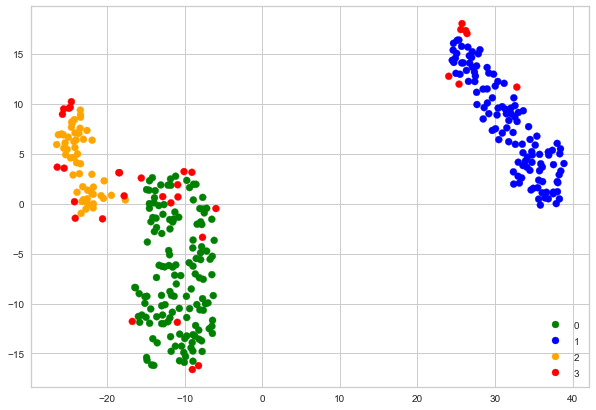

In [21]:
colours = ListedColormap(['green','blue','orange', 'red'])

plt.figure(figsize=(10,7))
scatter = plt.scatter(tsne_components[:,0], tsne_components[:,1], c=new_labels, cmap=colours)
plt.legend(*scatter.legend_elements(), loc = 4)
plt.show()

Klass 0, 1 och 2 är våra tre kluster och de röda punkterna är brus